In [1]:
import mouseQPCRModelSelection 
import numpy as np
import time
import AssignGPGibbsSingleLoop
import GPflow
import numpy as np
import time
import cPickle as pickle
import assigngp_dense
from matplotlib import pyplot as plt
%matplotlib inline
import branch_kernParamGPflow as bk
import BranchingTree as bt

In [2]:
subsetSelection = 0

In [3]:
pt,Yall = mouseQPCRModelSelection.LoadMouseQPCRData(subsetSelection=subsetSelection)
Y = Yall[:,0][None].T
print 'Y'
print Y.shape
strExp = 'MouseQPCR_Exp1'
m,_ = mouseQPCRModelSelection.InitModels(pt,Y)

Loaded GPLVM data/guo_ssData.p with nrowsXncols = (437, 2).
LoadMouseQPCRData output
Y
(437, 1)
Branching kernel =====================
unnamed.branchkernelparam.kern.variance transform:+ve prior:None
[ 1.]
unnamed.branchkernelparam.kern.lengthscales transform:+ve prior:None
[ 1.]
unnamed.branchkernelparam.Bv transform:(none) prior:None
[[ 1.]]
unnamed.white.variance transform:+ve prior:None
[ 1.]
Initialise models: MAP =====================

model.kern.branchkernelparam.kern.variance transform:+ve prior:None
[ 1.]
model.kern.branchkernelparam.kern.lengthscales transform:+ve prior:None
[ 1.]
model.kern.branchkernelparam.Bv transform:(none) prior:None
[[ 1.]]
model.kern.white.variance transform:+ve prior:None [FIXED]
[  1.00000000e-06]
model.likelihood.variance transform:+ve prior:None
[ 1.]
Initialise models: VB =====================
compiling tensorflow function...
done


In [4]:
numMAPsteps = 10
D=Y.shape[1]
print D

1


('\riteration 1 bound=-17524.1065383 grad=2900.94931221, beta=0',)
('\riteration 2 bound=-17266.1413321 grad=7087.36360977, beta=1.7936780889',)
('\riteration 3 bound=-14228.036549 grad=43437.4078261, beta=2.66805199294',)
('\riteration 4 bound=-4411.42897103 grad=449306.836618, beta=3.01227718392',)
('\riteration 6 bound=-3397.46865243 grad=194845.901466, beta=6.93039958922',)
('\riteration 7 bound=-2850.74506388 grad=62793.6656209, beta=0.0',)
('\riteration 9 bound=-2197.50893602 grad=65239.03517, beta=353.69318182',)
('\riteration 10 bound=-331.832224351 grad=102645.18472, beta=2.66738582836',)
('\riteration 11 bound=-195.816449748 grad=91413.0217089, beta=1.13597485373',)
('\riteration 12 bound=-82.0004380636 grad=21648.3433017, beta=0.0',)
('\riteration 13 bound=-40.3231036758 grad=4348.4439069, beta=0.0',)
('\riteration 14 bound=-5.31731405178 grad=3775.37396597, beta=0.0',)
('\riteration 15 bound=25.2754874065 grad=3400.59379044, beta=0.0',)
('\riteration 16 bound=54.4817228473 

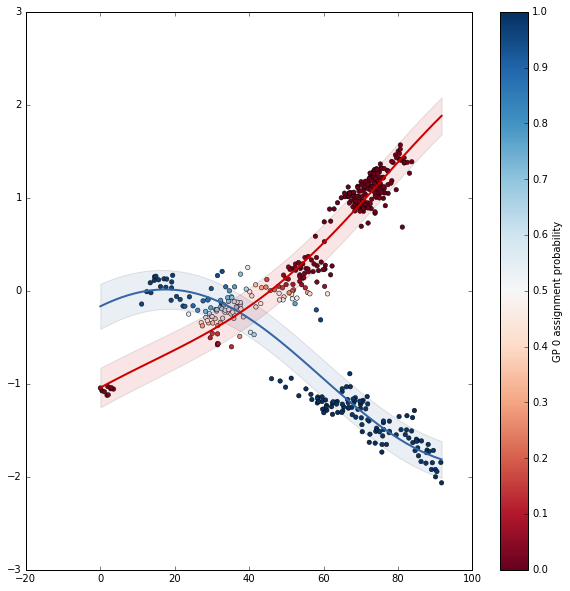

In [5]:
from GPclust import OMGP
m = OMGP(pt[:,None], Y, K=2, variance=0.01, prior_Z='DP') # use a truncated DP with K=2
m.rbf.lengthscale = 65
m.rbf_1.lengthscale = 65
m.optimize(step_length=0.01, maxiter=20)
fig=plt.figure(figsize=(10,10))
m.plot()

('\riteration 1 bound=175.534413533 grad=3156.51009543, beta=0',)
('\riteration 2 bound=190.810590165 grad=3324.24265883, beta=0.0',)
('\riteration 3 bound=204.17367968 grad=3151.13221793, beta=0.0',)
('\riteration 4 bound=216.535607407 grad=3498.86266281, beta=0.0',)
('\riteration 5 bound=226.135778155 grad=3155.1962828, beta=0.0',)
('\riteration 6 bound=235.513555914 grad=3444.09721455, beta=0.0',)
('\riteration 7 bound=243.44543022 grad=3079.42613782, beta=0.0',)
('\riteration 8 bound=251.369942179 grad=3383.70822017, beta=0.0',)
('\riteration 9 bound=257.834410661 grad=3047.53980678, beta=0.0',)
('\riteration 10 bound=264.282254203 grad=3364.23302467, beta=0.0',)
('\riteration 11 bound=269.720375295 grad=2956.67547602, beta=0.0',)
('\riteration 12 bound=275.493468636 grad=3303.88413673, beta=0.0',)
('\riteration 13 bound=280.347578783 grad=2894.01773147, beta=0.0',)
('\riteration 14 bound=285.620001163 grad=3291.34778151, beta=0.0',)
('\riteration 15 bound=290.019514494 grad=2836.8

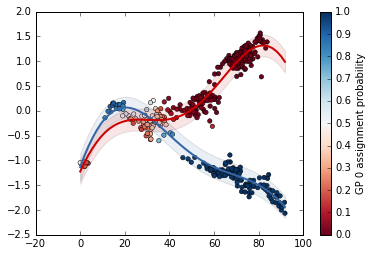

In [6]:
m.optimize(step_length=0.01, maxiter=200)
m.plot()

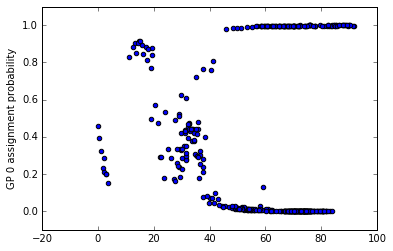

In [7]:
m.plot_probs()

In [8]:
m.phi.shape

(437, 2)

In [9]:
m

OMGP.,value,constraints,priors
variance,0.0122736723415,+ve,
rbf.variance,36.0833648943,+ve,
rbf.lengthscale,50.5354598214,+ve,
rbf_1.variance,127.759699396,+ve,
rbf_1.lengthscale,44.7028740397,+ve,


In [10]:
m.phi.sum(axis=1) # these are probabilities

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [11]:
def InitialisePhiFromOMGP(mV, phiOMGP, b = 40.):     
    # branching location needed
    # create index
    N = Y.shape[0]
    assert phiOMGP.shape[0] == N
    assert phiOMGP.shape[1] == 2 # run OMGP with K=2 trajectories

    phiInitial = np.zeros((N, 3*N))
    # large neg number makes exact zeros, make smaller for added jitter
    phiInitial_invSoftmax = -9. * np.ones((N, 3*N))  
    XExpanded = np.zeros((3*N, 2))
    XExpanded[:] = np.nan
    #phiInitial[:] = np.nan
    eps = 1e-12
    iterC = 0
    for i,p in enumerate(pt):
        if(p <b): # before branching - it's the root
            phiInitial[i,iterC:iterC+3] = np.array([1-2*eps,0+eps,0+eps])
        else:
            phiInitial[i,iterC:iterC+3] = np.hstack([eps,phiOMGP[i,:]-eps])
        phiInitial_invSoftmax[i,iterC:iterC+3] = np.log(phiInitial[i,iterC:iterC+3] )
        XExpanded[iterC:iterC+3,0] = pt[i]
        XExpanded[iterC:iterC+3,1] = np.array(range(1,4)) 
        iterC += 3

    assert np.any(np.isnan(phiInitial)) == False, 'no nans plaase ' + str( np.nonzero(np.isnan(phiInitial)))
    assert np.any(phiInitial < 0) == False, 'no negatives plaase ' + str( np.nonzero(np.isnan(phiInitial)))
    assert np.any(np.isnan(XExpanded)) == False, 'no nans plaase in XExpanded ' 
    
    if(mV is not None):
        mV.logPhi = phiInitial_invSoftmax
    return phiInitial, phiInitial_invSoftmax, XExpanded

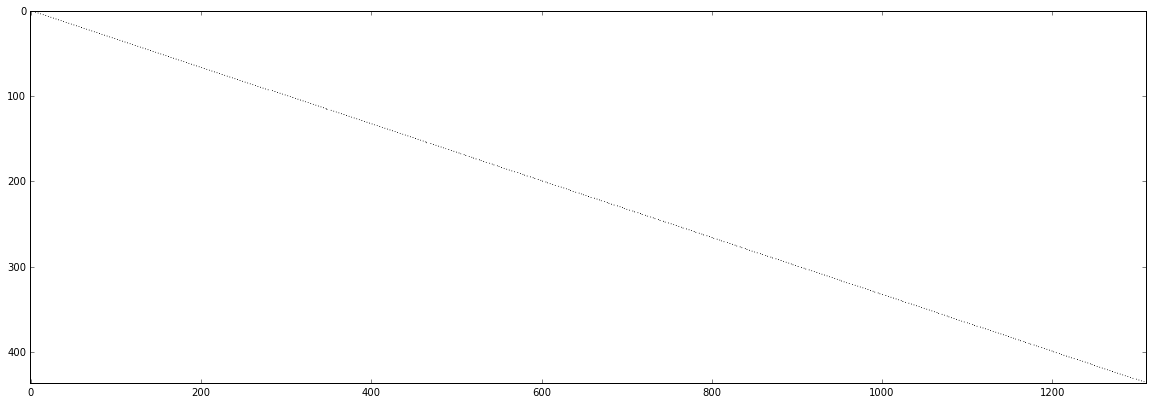

In [12]:
phiInitial, phiInitial_invSoftmax,XExpanded = InitialisePhiFromOMGP(None, phiOMGP=m.phi, b=40.)
fig=plt.figure(figsize=(20,20))
_=plt.imshow(phiInitial,cmap='Greys')

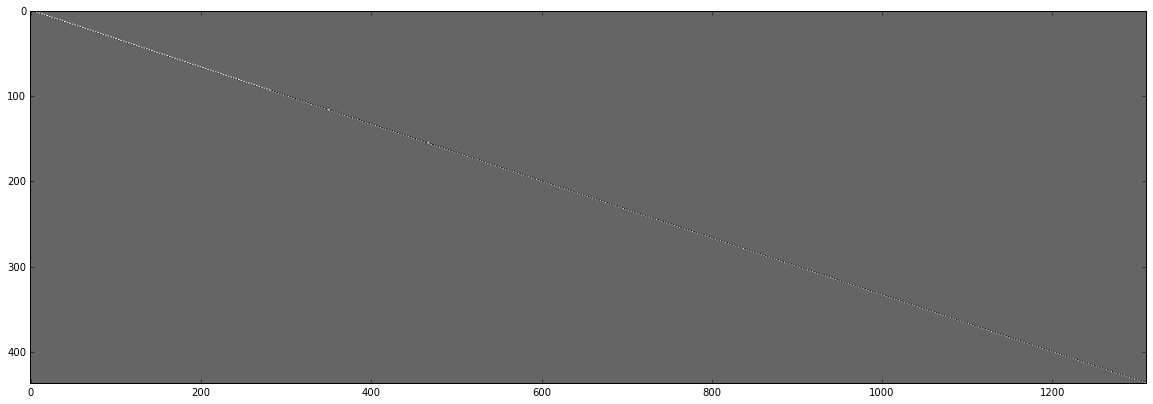

In [13]:
fig=plt.figure(figsize=(20,20))
_=plt.imshow(phiInitial_invSoftmax,cmap='Greys')

# VB Branching code

In [14]:
def InitModels(pt,XExpanded,Y):
    # code that's a bit crappy - we dont need this
    tree = bt.BinaryBranchingTree(0,90,fDebug=False) # set to true to print debug messages
    tree.add(None,1,10) # single branching point
    (fm, _) = tree.GetFunctionBranchTensor()
    KbranchVB = bk.BranchKernelParam(GPflow.kernels.RBF(1), fm, BvInitial=np.ones((1,1))) + GPflow.kernels.White(1) # other copy of kernel
    KbranchVB.branchkernelparam.Bv.fixed = True
    print 'Initialise models: VB ====================='
    mV = assigngp_dense.AssignGP(pt, XExpanded, Y, KbranchVB)
    mV.kern.white.variance = 1e-6
    mV.kern.white.variance.fixed = True
    
    mV._compile() # creates objective function

    return mV

In [15]:
mV = InitModels(pt,XExpanded,Y) # also do gene by gene

Initialise models: VB =====================
compiling tensorflow function...
done


In [16]:
mV

Name,values,prior,constriant
model.kern.white.variance,[ 1.00000000e-06],None,[FIXED]
model.kern.branchkernelparam.Bv,[[ 1.]],None,[FIXED]
model.kern.branchkernelparam.kern.variance,[ 1.],None,+ve
model.kern.branchkernelparam.kern.lengthscales,[ 1.],None,+ve
model.likelihood.variance,[ 1.],None,+ve
model.logPhi,"[[-1.07421282 1.072662 0.52873286 ..., 0.0950206 -0.62424398 0.33623398] [-0.55931401 -0.65880981 0.53203855 ..., -1.96532338 0.05513314 -1.15199184] [ 0.70951996 1.95583329 0.73647692 ..., 0.62369666 0.8048578 -1.12548753] ..., [ 1.10341221 0.14792687 1.79775523 ..., 0.25579647 -0.80866014 0.8290626 ] [-0.35362781 -0.58079611 1.31976956 ..., -1.04864254 -0.73809903 -0.44800095] [ 1.45679164 -0.53478045 0.39198795 ..., -1.96297446 0.52381268 1.19939858]]",None,(none)


In [17]:
m

OMGP.,value,constraints,priors
variance,0.0122736723415,+ve,
rbf.variance,36.0833648943,+ve,
rbf.lengthscale,50.5354598214,+ve,
rbf_1.variance,127.759699396,+ve,
rbf_1.lengthscale,44.7028740397,+ve,


In [18]:
# Initialise all model parameters using the OMGP model
# Note that the OMGP model has different kernel hyperparameters for each latent function whereas the branching model
# has one common set.
mV.logPhi = phiInitial_invSoftmax # initialise allocations from OMGP
mV.likelihood.variance = m.variance.values[0]
# set lengthscale to maximum
mV.kern.branchkernelparam.kern.lengthscales = np.max(np.array([m.rbf.lengthscale.values, m.rbf_1.lengthscale.values]))
# set process variance to average
mV.kern.branchkernelparam.kern.variance = np.mean(np.array([m.rbf.variance.values, m.rbf_1.variance.values]))
mV

Name,values,prior,constriant
model.kern.white.variance,[ 1.00000000e-06],None,[FIXED]
model.kern.branchkernelparam.Bv,[[ 1.]],None,[FIXED]
model.kern.branchkernelparam.kern.variance,[ 81.92153215],None,+ve
model.kern.branchkernelparam.kern.lengthscales,[ 50.53545982],None,+ve
model.likelihood.variance,[ 0.01227367],None,+ve
model.logPhi,"[[ -1.99995576e-12 -2.76310211e+01 -2.76310211e+01 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] ..., [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -2.76310211e+01 -6.13859701e+00 -2.16028080e-03]]",None,(none)


In [19]:
def FlattenPhi(mV):
    # return flattened and rounded Phi i.e. N X 3
    phiFlattened = np.zeros((mV.Y.shape[0],3)) # only single branching point
    Phi = np.round(np.exp(mV.logPhi._array),decimals=4)
    f=2 # which function to plot phi against - can be 1,2 or 3
    iterC=0
    for i,p in enumerate(mV.t):
        phiFlattened[i,:] = Phi[i,iterC:iterC+3] 
        iterC+=3
    return phiFlattened
Phi=FlattenPhi(mV)

In [20]:
def plotVBCode(mV,figsizeIn=(20,10),lw=3.,fs=10):
    from matplotlib import cm
    D = mV.Y.shape[0]
    fig=plt.figure(figsize=figsizeIn)
    B=mV.kern.branchkernelparam.Bv._array.flatten()
    assert B.size == 1, 'Code limited to one branch point, got ' + str(B.shape)
    pt = mV.t
    l = np.min(pt)
    u = np.max(pt)
    d = 0 # constraint code to be 1D for now
    for f in range(1, 4):
        if(f == 1):
            ttest = np.linspace(l, B, 100)[:, None]  # root
        else:
            ttest = np.linspace(B, u, 100)[:, None]
        Xtest = np.hstack((ttest, ttest*0+f))
        mu, var = mV.predict_f(Xtest)
        assert np.all(np.isfinite(mu)), 'All elements should be finite but are ' + str(mu)
        assert np.all(np.isfinite(var)), 'All elements should be finite but are ' + str(var)
        mean, = plt.plot(ttest, mu[:, d], linewidth=lw)
        col = mean.get_color()
        plt.plot(ttest.flatten(), mu[:, d] + 2*np.sqrt(var.flatten()), '--', color=col, linewidth=lw)
        plt.plot(ttest, mu[:, d] - 2*np.sqrt(var.flatten()), '--', color=col, linewidth=lw)

    v = plt.axis()
    plt.plot([B, B], v[-2:], '-m',linewidth=lw)
    
    # could also plot phi
    Phi=FlattenPhi(mV)
    gp_num = 1 # can be 0,1,2 
    plt.scatter(pt, mV.Y[:,d], c=Phi[:, gp_num], vmin=0., vmax=1, s=40)
    plt.colorbar(label='GP {} assignment probability'.format(gp_num))


[  -9.            1.            6.27807824   11.55615647   16.83423471
   22.11231295   27.39039118   32.66846942   37.94654765   43.22462589
   48.50270413   53.78078236   59.0588606    64.33693884   69.61501707
   74.89309531   80.17117355   85.44925178   90.72733002  100.72733002]
compiling tensorflow function...
done
Variational kernel branch value [-9.]
------------> Took 20.2285 secs. Bound = -4444.05
Variational kernel branch value [ 1.]
------------> Took 0.583782 secs. Bound = -4449.54
Variational kernel branch value [ 6.27807824]
------------> Took 0.585271 secs. Bound = -4439.79
Variational kernel branch value [ 11.55615647]
------------> Took 0.600661 secs. Bound = -4417.75
Variational kernel branch value [ 16.83423471]
------------> Took 0.594238 secs. Bound = -4414.70
Variational kernel branch value [ 22.11231295]
------------> Took 0.590725 secs. Bound = -4428.17
Variational kernel branch value [ 27.39039118]
------------> Took 0.588477 secs. Bound = -4430.03
Variational

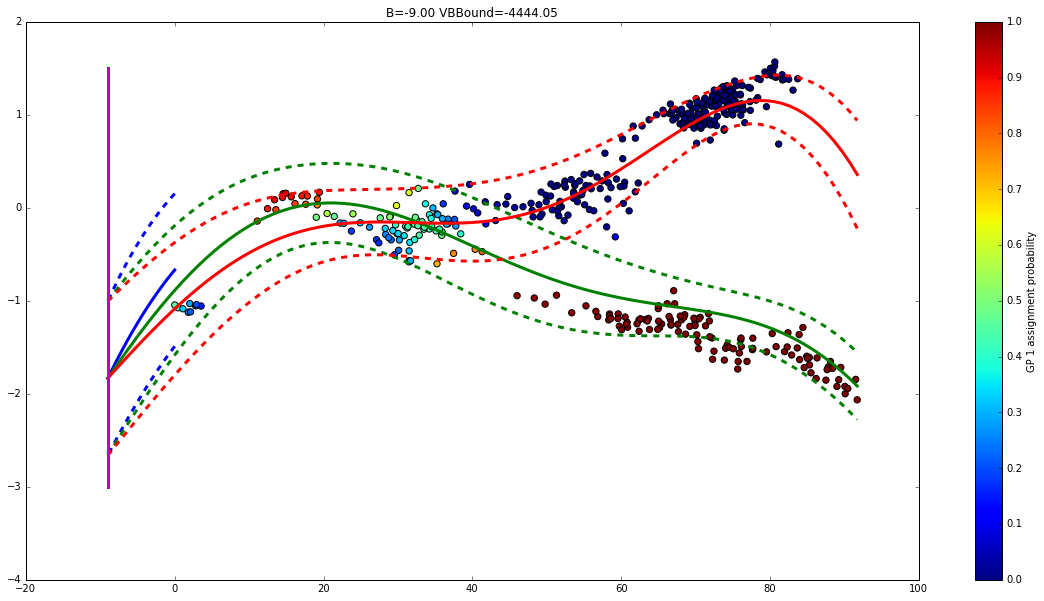

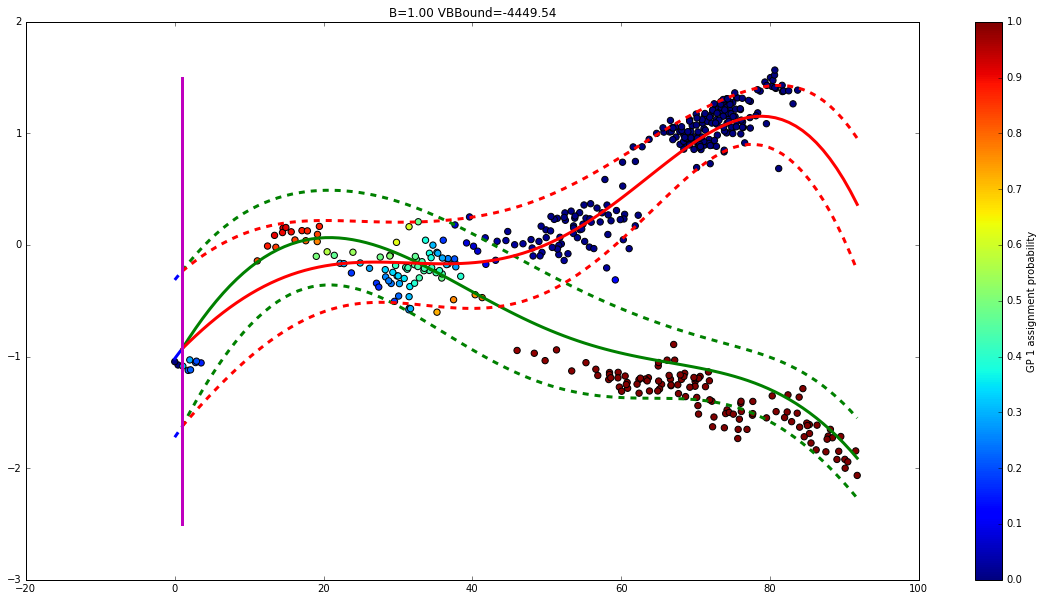

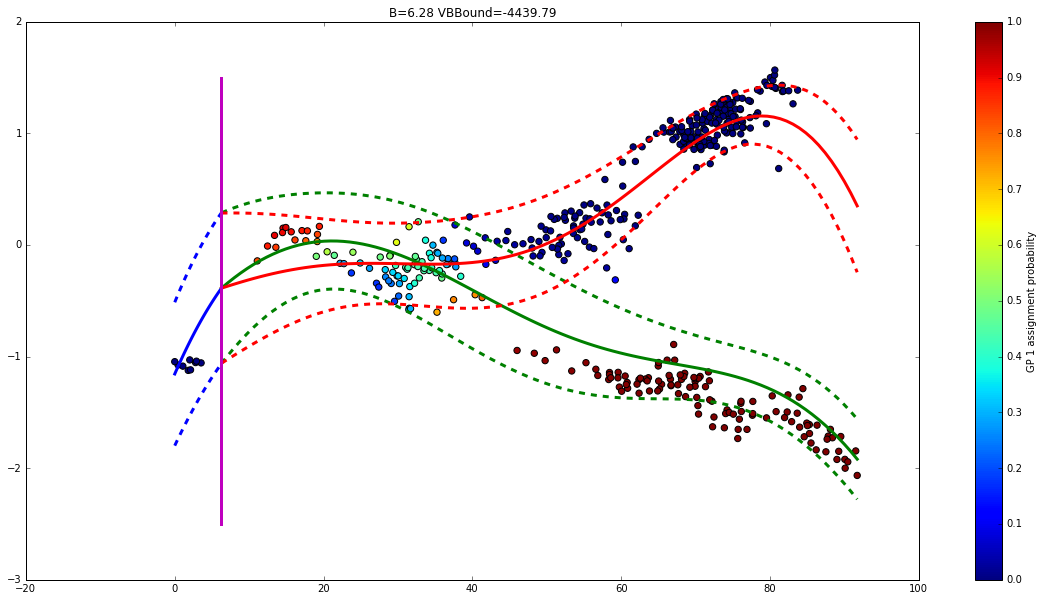

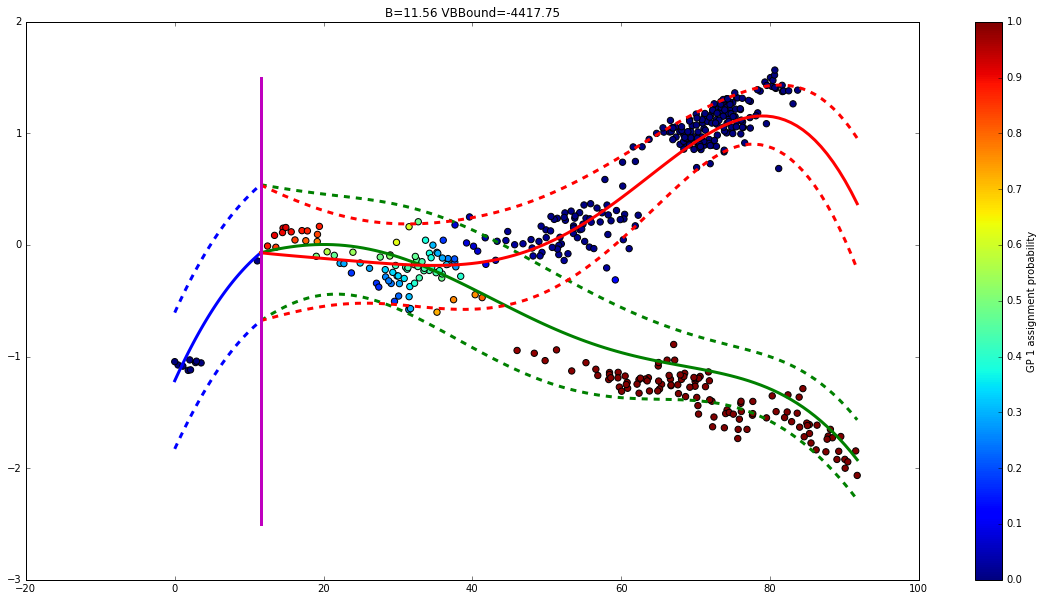

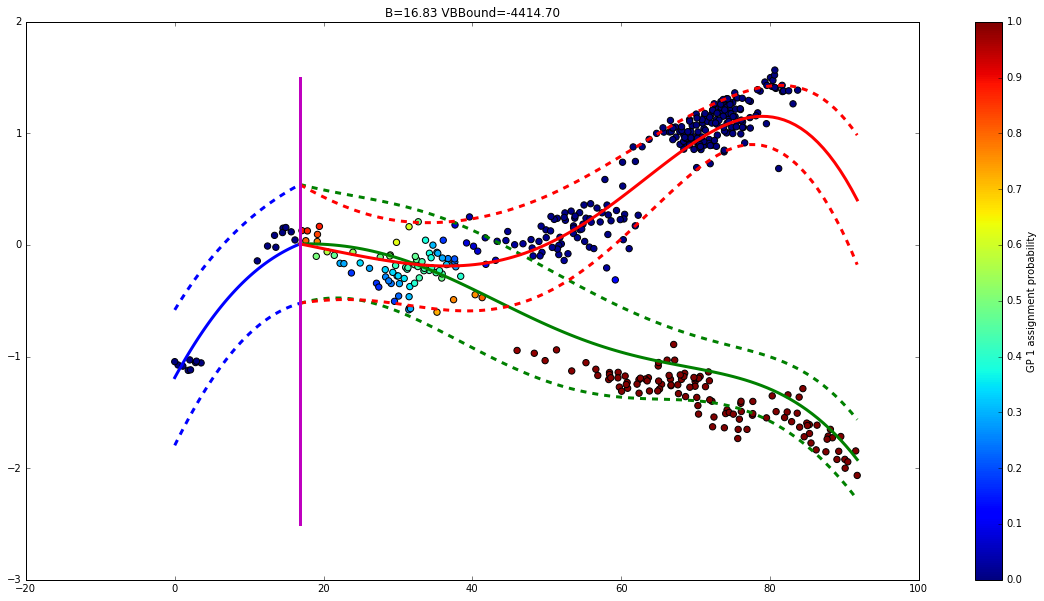

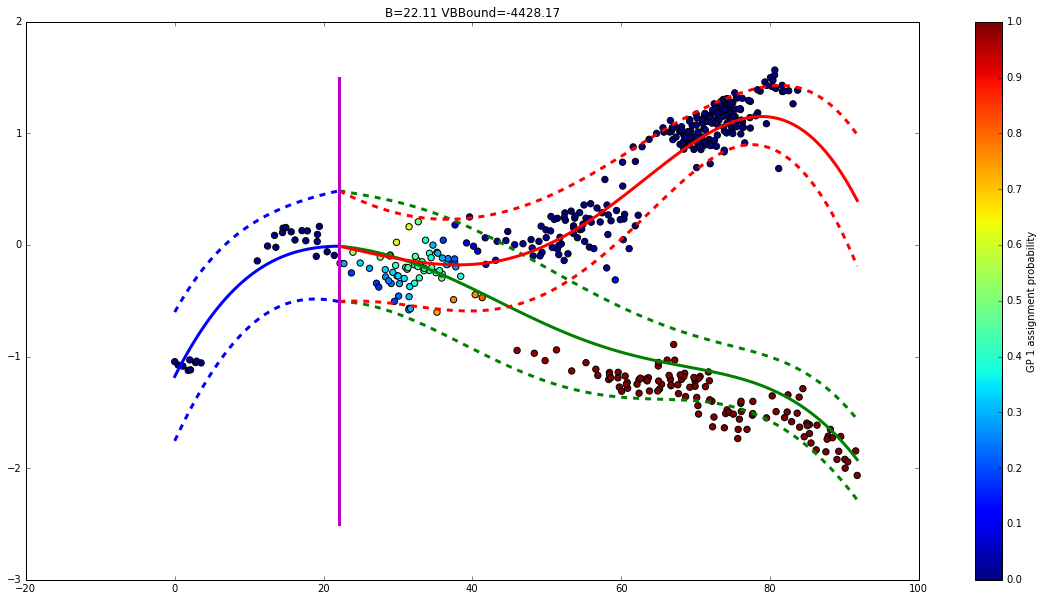

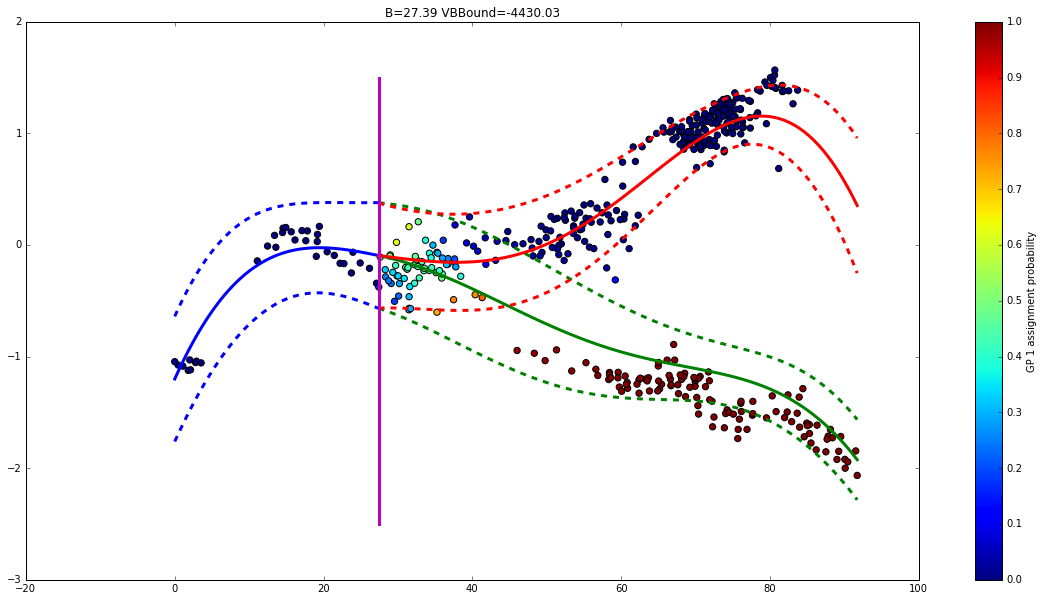

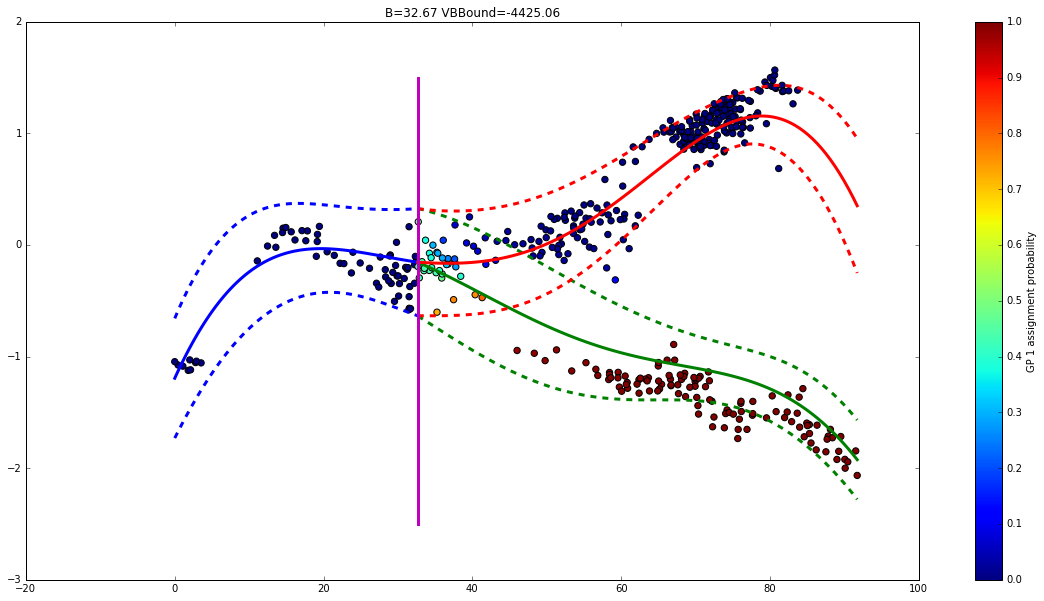

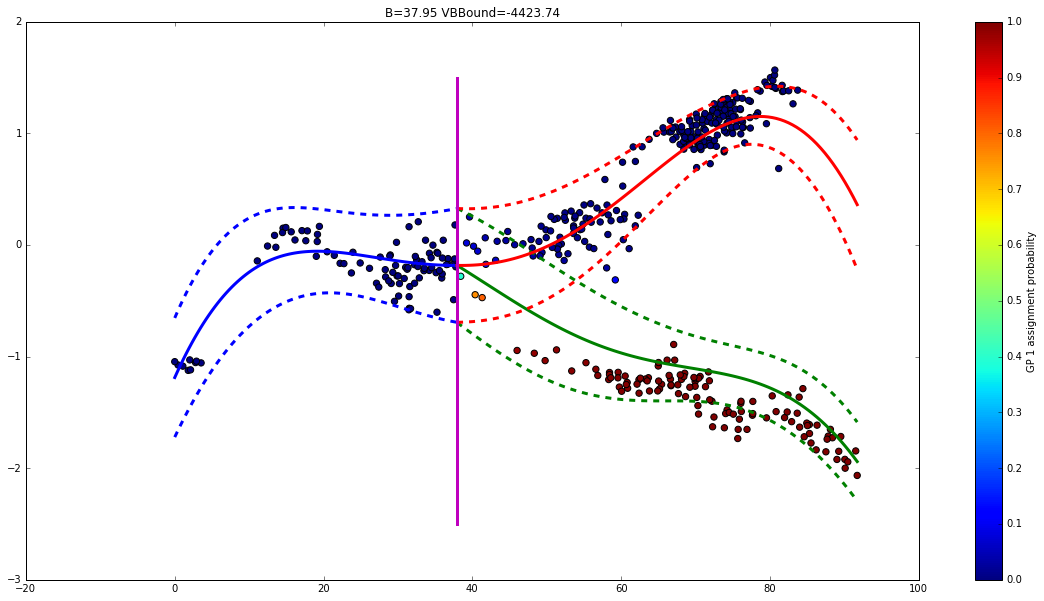

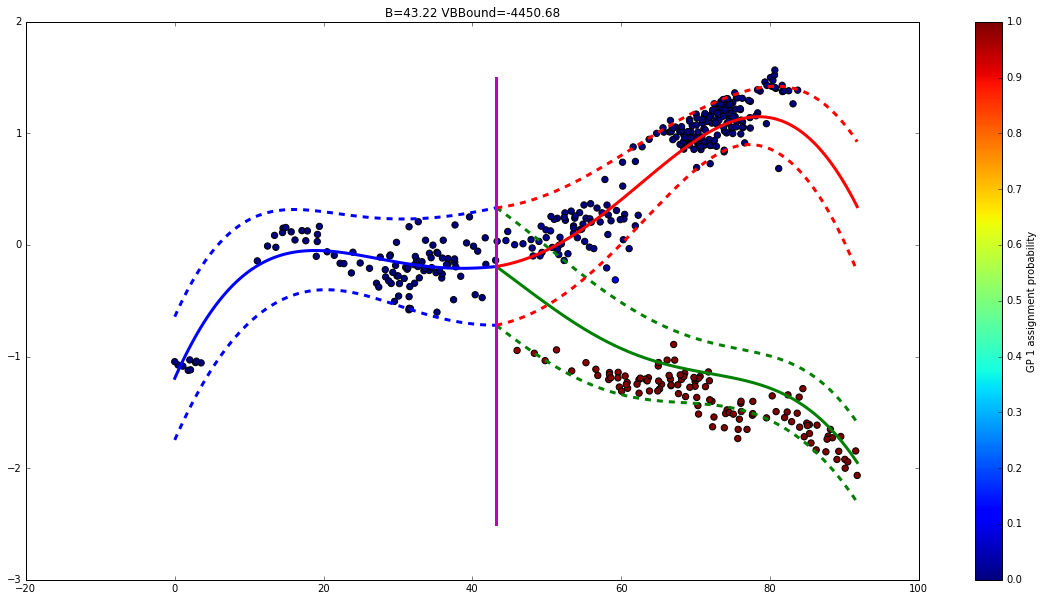

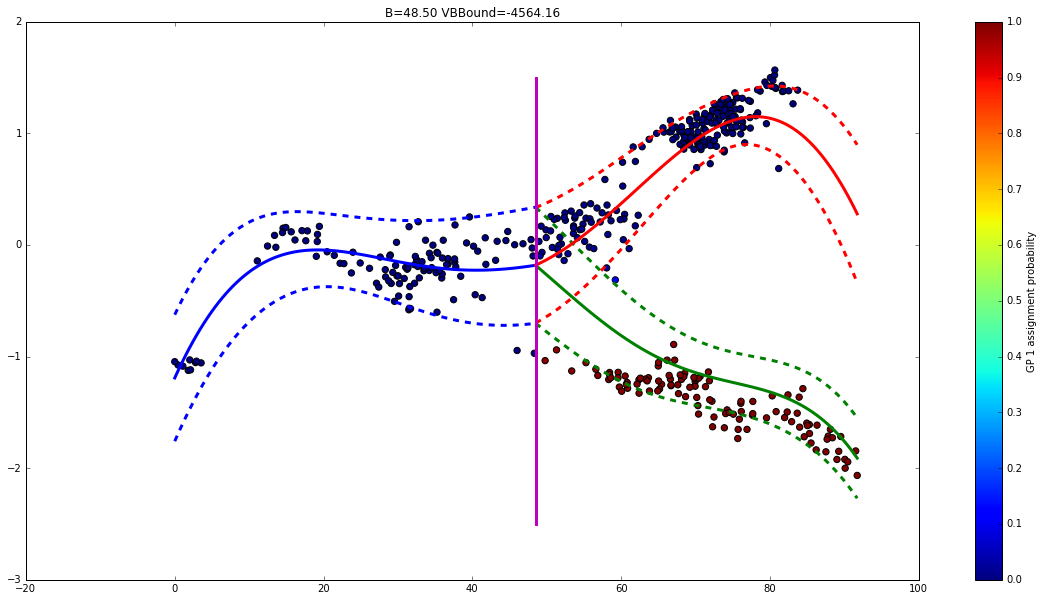

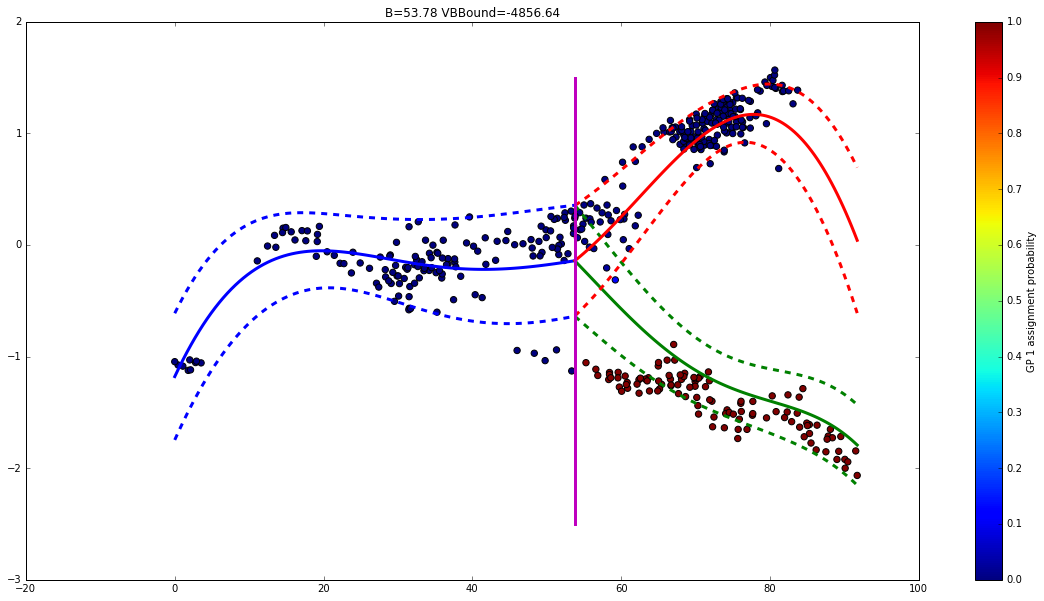

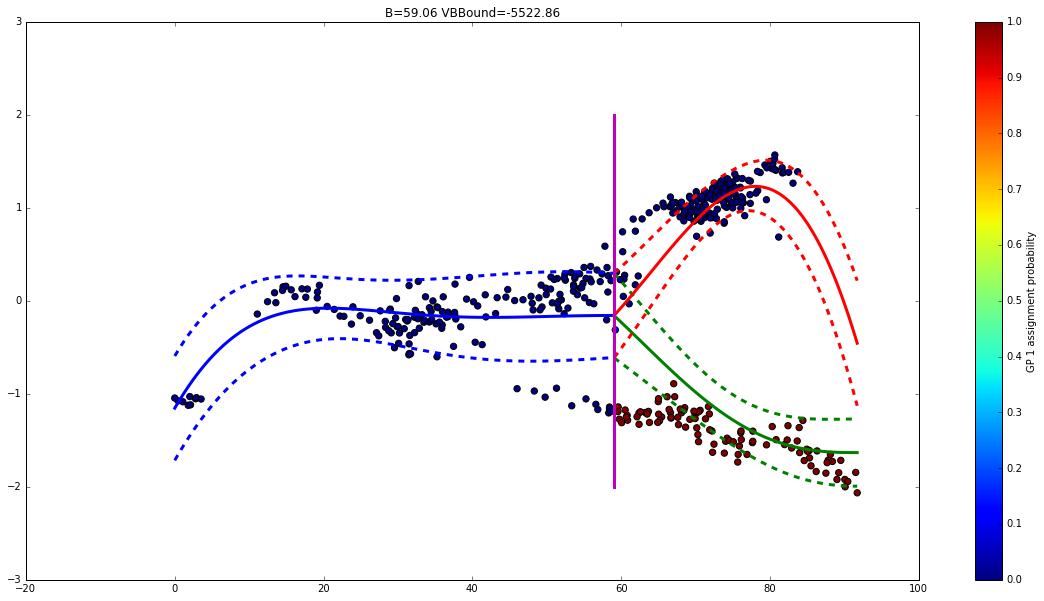

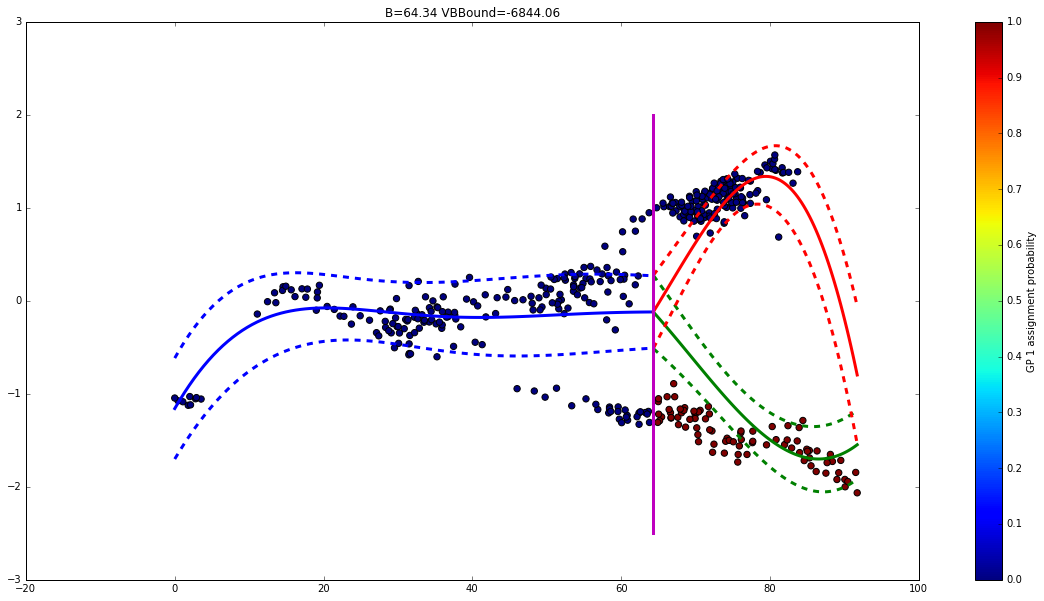

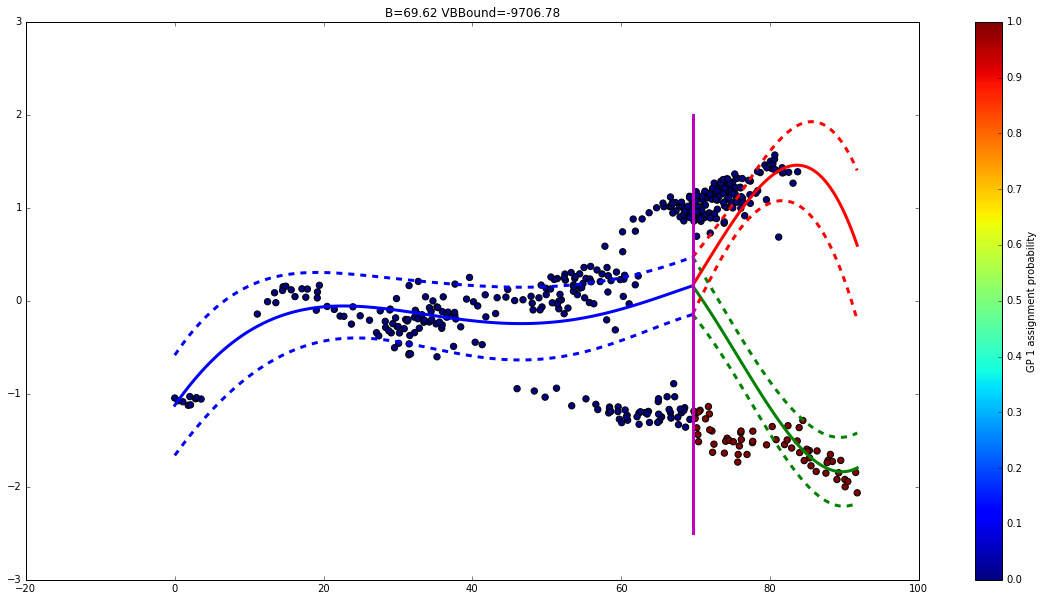

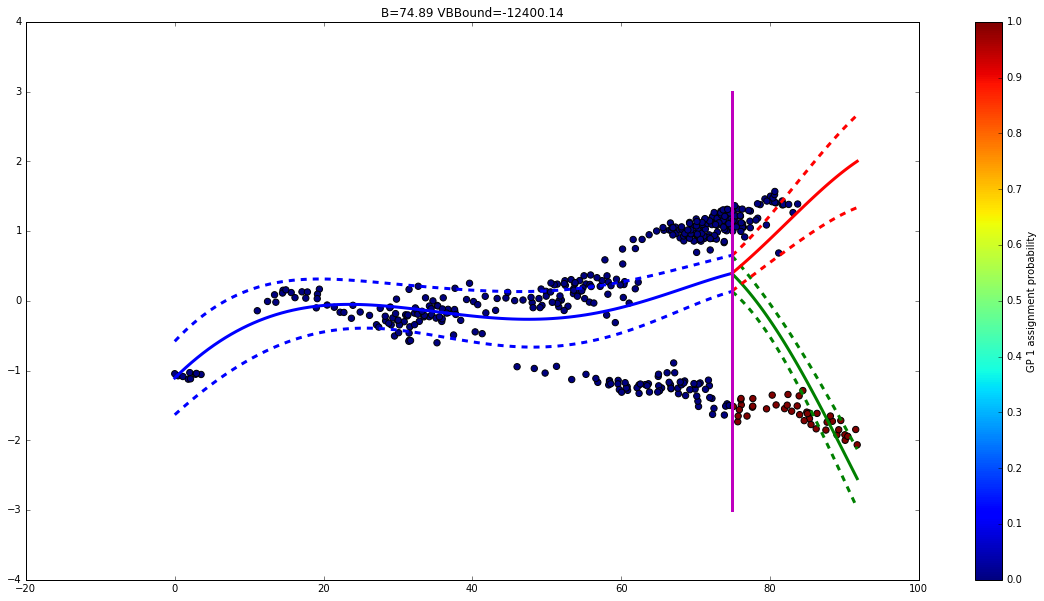

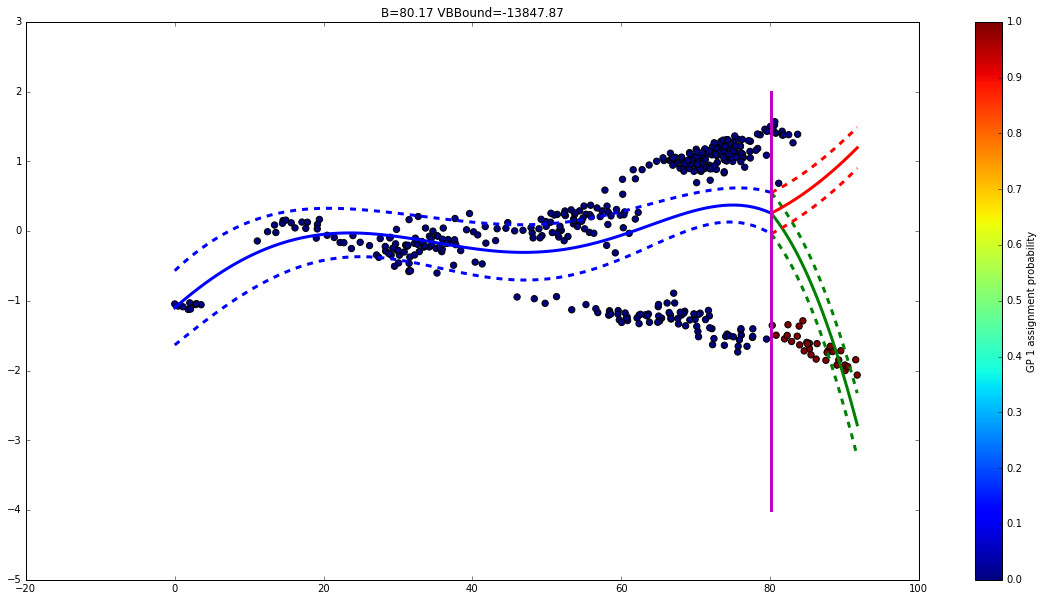

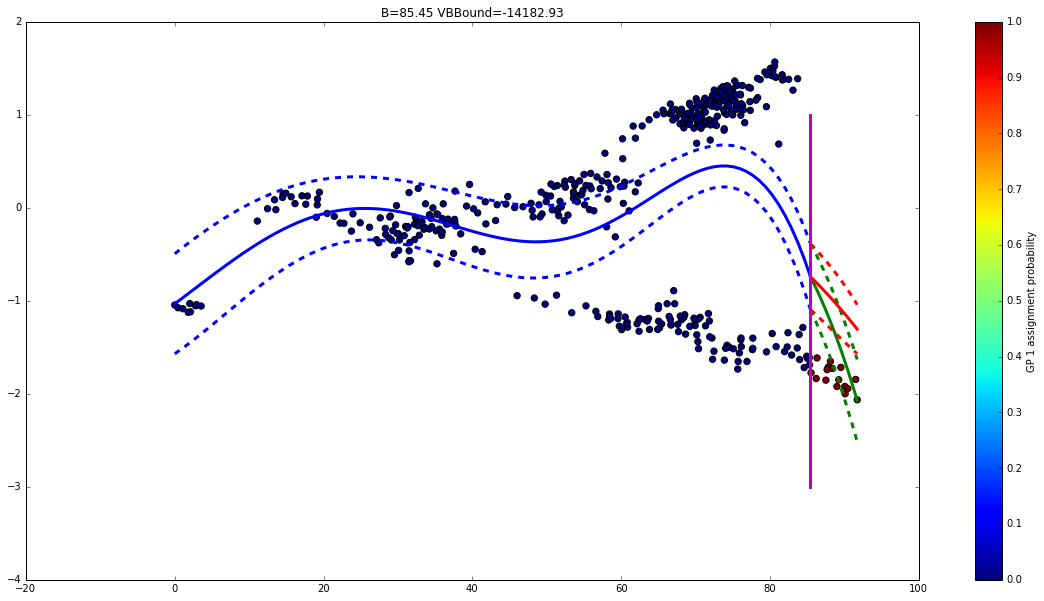

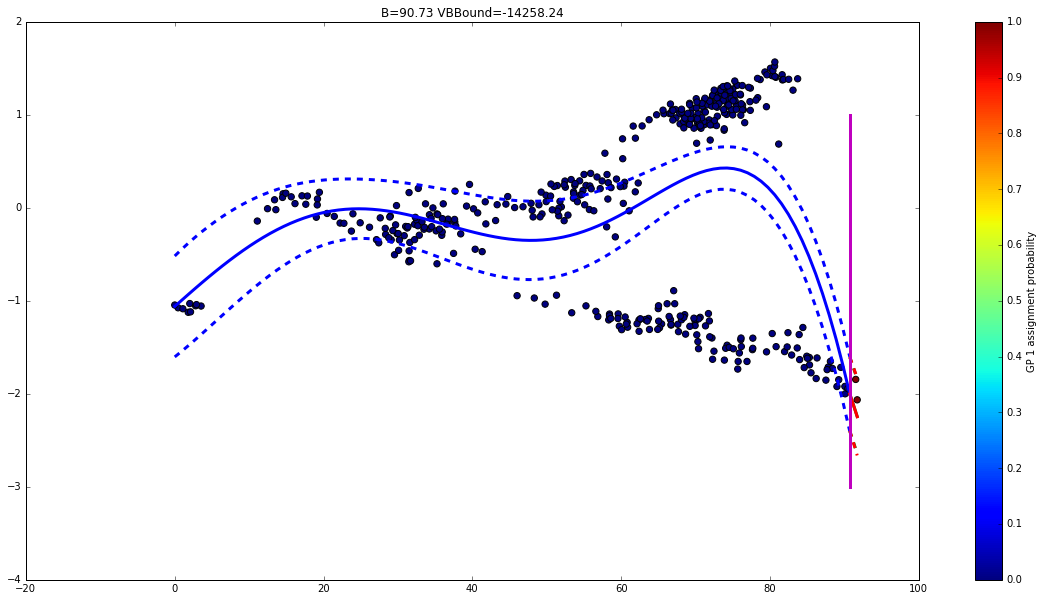

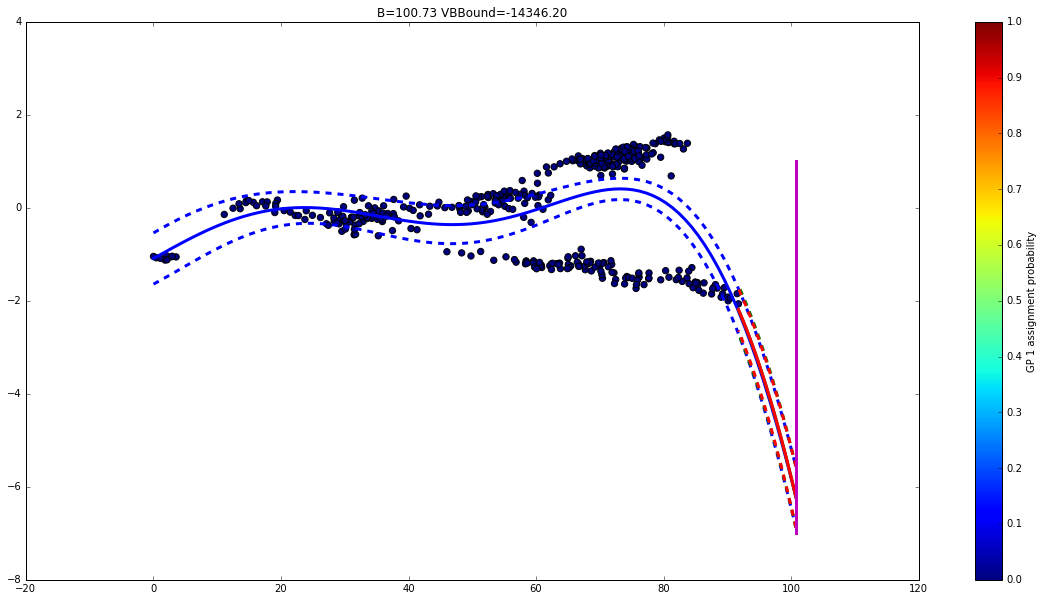

In [21]:
l = pt.min() + 1
u = pt.max() - 1
nb = 20
''' Create candidate list for branching values. 
Add two extreme values on either end.
    If first selected then we have no branching but two independent trajectory (OMG case).
    If last selected, there is no branching and only a single trajectory (Single).
'''
bs = np.hstack([np.array(l-10),np.linspace(l,u,nb-2),np.array(u+10)]) 
print bs
logVBBound = []

mV.kern.branchkernelparam.Bv.fixed = False # we wont optimize so this is fine
mV._compile()

for ib,b in enumerate(bs):        
    t0=time.time()
    # Variational bound computation
    mV.kern.branchkernelparam.Bv = np.atleast_2d(b)
    print 'Variational kernel branch value ' + str(mV.kern.branchkernelparam.Bv._array.flatten())
    
    InitialisePhiFromOMGP(mV, phiOMGP=m.phi, b = b) # need to redo Phi computation so branching point is taken into account
    
    # could also optimize
    VBbound = mV.compute_log_likelihood() # we wish to maximise!
    logVBBound.append(VBbound)
    print '------------> Took %g secs. Bound = %.2f'%(time.time()-t0,VBbound)
    
    plotVBCode(mV)
    plt.title('B=%.2f VBBound=%.2f'%(b,VBbound) )
    
    

In [22]:
mV

Name,values,prior,constriant
model.kern.white.variance,[ 1.00000000e-06],None,[FIXED]
model.kern.branchkernelparam.Bv,[[ 100.72733002]],None,(none)
model.kern.branchkernelparam.kern.variance,[ 81.92153215],None,+ve
model.kern.branchkernelparam.kern.lengthscales,[ 50.53545982],None,+ve
model.likelihood.variance,[ 0.01227367],None,+ve
model.logPhi,"[[ -1.99995576e-12 -2.76310211e+01 -2.76310211e+01 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] ..., [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -1.99995576e-12 -2.76310211e+01 -2.76310211e+01]]",None,(none)


16.834234709 -> [-4414.7030618]


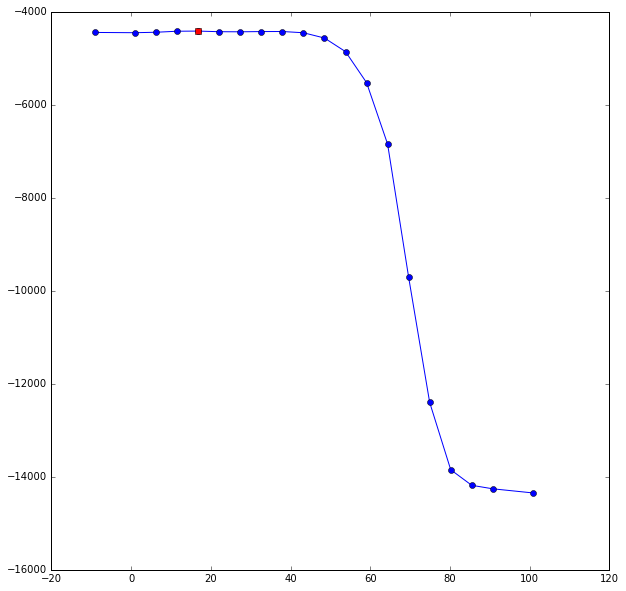

In [23]:
fig=plt.figure(figsize=(10,10))
plt.plot(bs,logVBBound,'-ob')
maxVB = np.argmax(logVBBound)
plt.plot(bs[maxVB],logVBBound[maxVB],'rs')
print str(bs[maxVB]) + ' -> ' + str(logVBBound[maxVB])

In [ ]:
# try optimisation
l = pt.min() + 1
u = pt.max() - 1
nb = 20
''' Create candidate list for branching values. 
Add two extreme values on either end.
    If first selected then we have no branching but two independent trajectory (OMG case).
    If last selected, there is no branching and only a single trajectory (Single).
'''
bs = np.hstack([np.array(l-10),np.linspace(l,u,nb-2),np.array(u+10)]) 
print bs
logVBBound = []

mV.kern.branchkernelparam.Bv.fixed = True # we will optimize so this needs to be fixed

for ib,b in enumerate(bs):        
    t0=time.time()
    # Variational bound computation
    mV.kern.branchkernelparam.Bv = np.atleast_2d(b)
    print 'Variational kernel branch value ' + str(mV.kern.branchkernelparam.Bv._array.flatten())
    
    # Initialise all model parameters using the OMGP model
    phiInitial, phiInitial_invSoftmax,XExpanded = InitialisePhiFromOMGP(mV, phiOMGP=m.phi, b=b)   
    mV.logPhi = phiInitial_invSoftmax # initialise allocations from OMGP
    mV.likelihood.variance = m.variance.values[0]
    mV.kern.branchkernelparam.kern.lengthscales = np.max(np.array([m.rbf.lengthscale.values, m.rbf_1.lengthscale.values]))
    mV.kern.branchkernelparam.kern.variance = np.mean(np.array([m.rbf.variance.values, m.rbf_1.variance.values]))

    # optimize
    mV.optimize() # should recompile due to updated branch point
    
    VBbound = mV.compute_log_likelihood() # we wish to maximise!
    logVBBound.append(VBbound)
    print '------------> Took %g secs. Bound = %.2f'%(time.time()-t0,VBbound)
    
    plotVBCode(mV)
    plt.title('B=%.2f VBBound=%.2f'%(b,VBbound) )
    
    
fig=plt.figure(figsize=(10,10))
plt.plot(bs,logVBBound,'-ob')

# Bayesian optimisation
1. Use GPyOpt to learn branching point and kernel hyperparameters.
1. set fixed=False for all parameters except for Phi.fixed=True
1. It's still beneficial to use *VB code* rather than *Jings model* since we integrate out (approximately using VB bound) uncertainty in allocation (Phi).
1. Store all intermediate values visited by GPyOpt?
1. Use Matern 3/2 or 5/2 for both OMGP and our model. Actually different kernels for OMGP and our can make sense as outputs different (potentially)?
1. Effect of Phi on inference of branching point?
1. add assert in VB code that before branching point, allocations probs==1 for 1st function.


In [24]:
import GPyOpt

In [39]:
# Objective function
class objectiveB:
    def __init__(self, Binit):
        mV.kern.branchkernelparam.Bv.fixed = False # we wont optimize so this is fine
        mV.logPhi.fixed = False # allocations not fixed for GPyOpt because we update them for each branch point

        mV.likelihood.variance.fixed = True # no kernel parameters optimised
        mV.kern.branchkernelparam.kern.lengthscales.fixed = True
        mV.kern.branchkernelparam.kern.variance.fixed = True

        # initial branch point
        mV.kern.branchkernelparam.Bv = Binit
        InitialisePhiFromOMGP(mV, phiOMGP=m.phi, b=Binit)   
        # Initialise all model parameters using the OMGP model
        mV.likelihood.variance = m.variance.values[0]
        mV.kern.branchkernelparam.kern.lengthscales = np.max(np.array([m.rbf.lengthscale.values, m.rbf_1.lengthscale.values]))
        mV.kern.branchkernelparam.kern.variance = np.mean(np.array([m.rbf.variance.values, m.rbf_1.variance.values]))
        mV._compile()
        
    def f(self, theta):
        # theta is nxp array, return nx1
        n=theta.shape[0]
        VBboundarray = np.ones((n,1))
        for i in range(n):
            mV.kern.branchkernelparam.Bv = theta[i,0]
            InitialisePhiFromOMGP(mV, phiOMGP=m.phi, b=theta[i,0])   
            VBboundarray[i] = -mV.compute_log_likelihood() # we wish to minimize!
            print 'objectiveB B=' + str(theta[i,0]) + ' -> ' + str(VBboundarray[i] )
        return VBboundarray

In [51]:
# Objective function
class objectiveBAndK:
    def __init__(self, Binit):
        mV.kern.branchkernelparam.Bv.fixed = False # we wont optimize so this is fine
        mV.logPhi.fixed = False # allocations not fixed for GPyOpt because we update them for each branch point

        mV.likelihood.variance.fixed = False # all kernel parameters optimised
        mV.kern.branchkernelparam.kern.lengthscales.fixed = False
        mV.kern.branchkernelparam.kern.variance.fixed = False

        # initial branch point
        mV.kern.branchkernelparam.Bv = Binit
        InitialisePhiFromOMGP(mV, phiOMGP=m.phi, b=Binit)  
        # Initialise all model parameters using the OMGP model 
        mV.likelihood.variance = m.variance.values[0]
        mV.kern.branchkernelparam.kern.lengthscales = np.max(np.array([m.rbf.lengthscale.values, m.rbf_1.lengthscale.values]))
        mV.kern.branchkernelparam.kern.variance = np.mean(np.array([m.rbf.variance.values, m.rbf_1.variance.values]))
        mV._compile()

    def f(self, theta):
        # theta is nxp array, return nx1
        n=theta.shape[0]
        VBboundarray = np.ones((n,1))
        for i in range(n):
            mV.kern.branchkernelparam.Bv = theta[i,0]
            InitialisePhiFromOMGP(mV, phiOMGP=m.phi, b=theta[i,0])   
            mV.likelihood.variance = theta[i,1]
            mV.kern.branchkernelparam.kern.lengthscales = theta[i,2]
            mV.kern.branchkernelparam.kern.variance = theta[i,3]

            VBboundarray[i] = -mV.compute_log_likelihood() # we wish to minimize!
            print 'objectiveB B=%.0f likvar=%.0f len=%.0f var=%.0f VB=%.0f'%(theta[i,0], theta[i,1], theta[i,2], theta[i,3], VBboundarray[i] )
        return VBboundarray

In [26]:
# try optimisation
l = pt.min() + 1
u = pt.max() - 1
# We need constraints on there parameters
# B = [l,u] 
# lik.variance > 0
# kern.lengthscale, variance > 0

In [44]:
# --- Optimize B 
myobj = objectiveB(np.ones((1,1))*(l+u)/2) # pass in initial point - start at mid-point
bounds = [(l,u)]
# BOobj = GPyOpt.methods.BayesianOptimization(f=myobj.f,  # function to optimize       
#                                             bounds=bounds)              # normalized y                       
BOobj = GPyOpt.methods.BayesianOptimization(f=myobj.f,  # function to optimize       
                                            bounds = bounds,                     # box-constrains of the problem
                                            acquisition = 'EI',                 # Selects the Expected improvement
                                            acquisition_par = 0,                 # parameter of the acquisition function
                                            normalize = False)                    # Normalize the acquisition function
    
t0=time.time()
max_iter = 20 
n_cores = 4

# BOobj.run_optimization(max_iter,                             # Number of iterations
#                         n_inbatch = n_cores,                        # size of the collected batches (= number of cores)
#                         eps = 1e-6)                                # secondary stop criteria (apart from the number of iterations) 
BOobj.run_optimization(max_iter,                             # Number of iterations
                        acqu_optimize_method = 'fast_random',       # method to optimize the acq. function
                        n_inbatch = n_cores,                        # size of the collected batches (= number of cores)
                        batch_method='lp',                          # method to collected the batches (maximization-penalization)
                        acqu_optimize_restarts = 30,                # number of local optimizers
                        eps = 1e-6)                                # secondary stop criteria (apart from the number of iterations) 

print 'GPyOpt took %g secs ' %(time.time()-t0)

compiling tensorflow function...
done
objectiveB B=56.3579079912 -> [ 5121.71847585]
objectiveB B=10.0559545447 -> [ 4422.32616064]
objectiveB B=36.8847237714 -> [ 4423.44809355]
objectiveB B=66.4366438971 -> [ 7828.05692673]
objectiveB B=73.8740771501 -> [ 11973.98034567]
objectiveB B=86.2216550097 -> [ 14173.60260812]
objectiveB B=27.4942511887 -> [ 4429.75666393]
objectiveB B=74.6334056892 -> [ 12297.74916474]
objectiveB B=3.21609680412 -> [ 4450.14051623]
objectiveB B=90.7273300179 -> [ 14258.23575997]
objectiveB B=1.44574848348 -> [ 4449.83887735]
objectiveB B=42.6584575082 -> [ 4445.06290816]
objectiveB B=46.06544942 -> [ 4496.82456833]
objectiveB B=38.5528789254 -> [ 4424.79687413]
objectiveB B=35.6682662137 -> [ 4423.68897176]
objectiveB B=1.0 -> [ 4449.53611558]
objectiveB B=41.6061580822 -> [ 4437.13103604]
objectiveB B=45.5220899225 -> [ 4485.78844199]
objectiveB B=37.4050369581 -> [ 4423.98397705]
objectiveB B=40.9765306496 -> [ 4433.16857188]
objectiveB B=1.0 -> [ 4449.536

In [53]:
# --- Optimize both B and K
myobj = objectiveBAndK(np.ones((1,1))*(l+u)/2) # pass in initial point - start at mid-point
eps = 1e-6
bounds = [(l,u),(eps,3*Y.var()), (eps,pt.max()), (eps,3*Y.var())]  # B, lik var, len, var

BOobj = GPyOpt.methods.BayesianOptimization(f=myobj.f,  # function to optimize       
                                            bounds=bounds)              # normalized y                       
t0=time.time()
max_iter = 20 
import multiprocessing
n_cores = multiprocessing.cpu_count()

BOobj.run_optimization(max_iter,                             # Number of iterations
                       acqu_optimize_method = 'fast_random',        # method to optimize the acq. function
                       acqu_optimize_restarts = 30,
                       batch_method='lp',
                       n_inbatch = n_cores,                        # size of the collected batches (= number of cores)
                       eps = 1e-6)                                # secondary stop criteria (apart from the number of iterations) 

print 'GPyOpt took %g secs ' %(time.time()-t0)

compiling tensorflow function...
done
objectiveB B=89.9438922557 -> [ 850.17606391]
objectiveB B=15.3908799662 -> [ 1047.13965255]
objectiveB B=2.11465833564 -> [ 973.74456787]
objectiveB B=79.6984407539 -> [ 886.83677033]
objectiveB B=47.2690704401 -> [ 966.29271258]
objectiveB B=50.1726128364 -> [ 1067.98440469]
objectiveB B=77.3507927957 -> [ 884.77807436]
objectiveB B=88.7221273313 -> [ 893.26572985]
objectiveB B=60.1164019418 -> [ 925.77585607]
objectiveB B=70.9844749915 -> [ 887.12055106]
objectiveB B=54.5399996933 -> [ 968.16566378]
objectiveB B=72.7162474053 -> [ 1012.02410046]
objectiveB B=14.1082415888 -> [ 787.88606385]
objectiveB B=90.7273300179 -> [ 949.59643419]
objectiveB B=79.04898747 -> [ 956.25011905]
objectiveB B=12.9086014086 -> [ 922.21649276]
objectiveB B=8.48150972392 -> [ 976.08259602]
objectiveB B=6.40727109691 -> [ 1014.54311781]
objectiveB B=89.7146269249 -> [ 863.18058971]
objectiveB B=84.9599457249 -> [ 853.90908757]
objectiveB B=1.72569853051 -> [ 842.0601

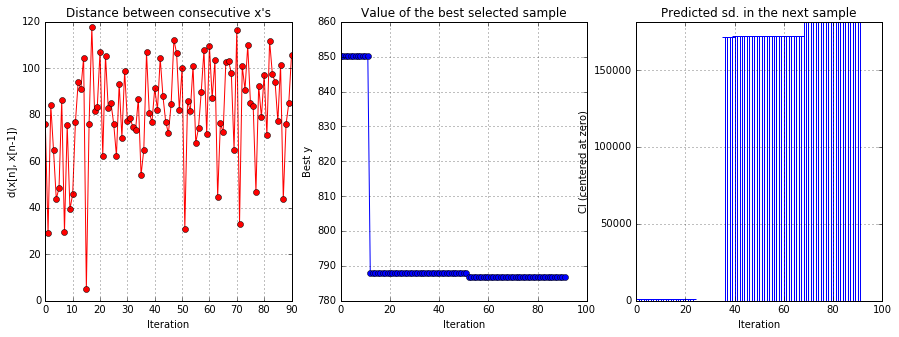

In [54]:
BOobj.plot_acquisition()
BOobj.plot_convergence()

In [42]:
print 'Solution found by BO'
print BOobj.x_opt
print BOobj.fx_opt
print 'Solution found by grid search on B only'
print str(bs[maxVB]) + ' -> ' + str(-logVBBound[maxVB])

# Can explicitly check computation using myobj.f(np.ones((1,1))*16.834)
# should add assert that Phi before branching point is 1 everywhere!

objectiveB B=16.834 -> [ 4414.70252366]


array([[ 4414.70252366]])

In [59]:
# plot best solution
mV.kern.branchkernelparam.Bv = BOobj.x_opt[0]
InitialisePhiFromOMGP(mV, phiOMGP=m.phi, b=BOobj.x_opt[0])   
mV.likelihood.variance = BOobj.x_opt[1]
mV.kern.branchkernelparam.kern.lengthscales = BOobj.x_opt[2]
mV.kern.branchkernelparam.kern.variance = BOobj.x_opt[3]
mV

Name,values,prior,constriant
model.kern.white.variance,[ 1.00000000e-06],None,[FIXED]
model.kern.branchkernelparam.Bv,[[ 28.55967386]],None,(none)
model.kern.branchkernelparam.kern.variance,[ 2.25419245],None,+ve
model.kern.branchkernelparam.kern.lengthscales,[ 15.21354545],None,+ve
model.likelihood.variance,[ 0.31836912],None,+ve
model.logPhi,"[[ -1.99995576e-12 -2.76310211e+01 -2.76310211e+01 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] ..., [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -9.00000000e+00 -9.00000000e+00 -9.00000000e+00] [ -9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ..., -2.76310211e+01 -6.13859701e+00 -2.16028080e-03]]",None,(none)


Bound got 786.72 should be 786.72


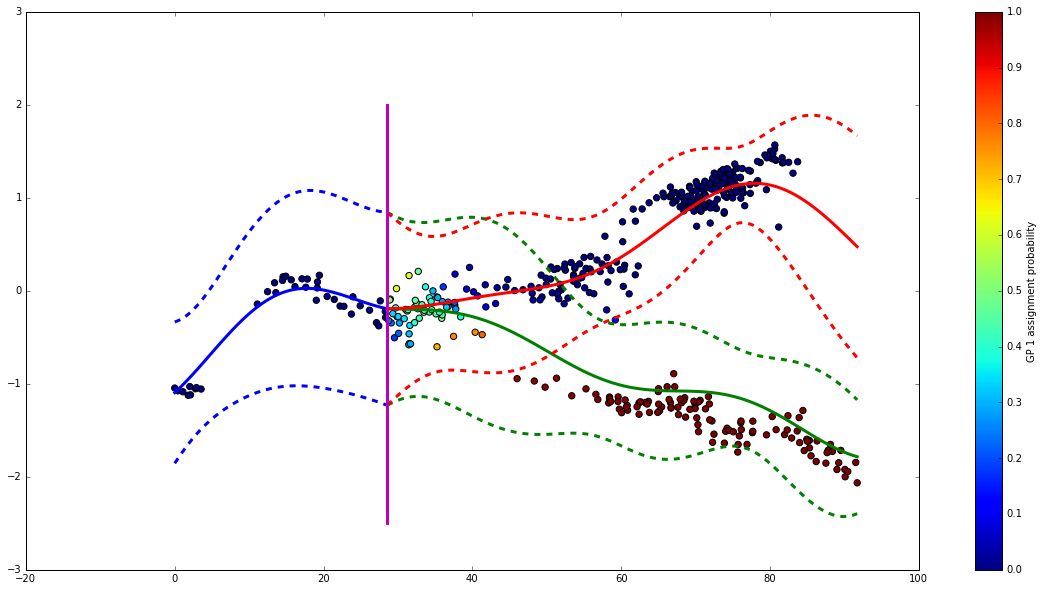

In [60]:
print 'Bound got %.2f should be %.2f'%(-mV.compute_log_likelihood(), BOobj.fx_opt)
plotVBCode(mV)

In [63]:
strSaveState = 'InitialAllocationOMGP'
saveDict = {'phiOMGP':m.phi, 'likvar':m.variance.values[0], \
            'pt':pt, 'XExpanded':XExpanded, \
            'lenscale':np.max(np.array([m.rbf.lengthscale.values, m.rbf_1.lengthscale.values])),\
            'var':np.mean(np.array([m.rbf.variance.values, m.rbf_1.variance.values])),\
           }
pickle.dump( saveDict, open( 'modelfiles/'+strSaveState + '.p', "wb" ) )

In [64]:
pt.shape

(437,)

In [65]:
XExpanded.shape

(1311, 2)